In [2]:
from google.colab import files
import pandas as pd

print("Upload your CSV file...")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df.head()


Upload your CSV file...


Saving gender_inequality_clean.csv to gender_inequality_clean.csv


,hdi_rank,country,gii_2023,gii_rank_2023,mmr_2020,adolescent_birth_rate_2023,parliament_seats_female_pct_2023,secondary_education_female_pct_2023,secondary_education_male_pct_2023,labour_force_female_pct_2023,labour_force_male_pct_2023
0,1,Iceland,0.024,NaN,2.654417805,3.369,47.61904762,99.87591553,99.58273315,70.46,79.31
1,2,Norway,0.004,NaN,1.663741403,1.405,46.15384615,95.92950439,98.50509644,62.13,69.2
2,2,Switzerland,0.01,NaN,7.378754713,1.483,37.80487805,98.03656006,98.32416534,62.57,72.86
3,4,Denmark,0.003,NaN,4.65771671,1.140,43.57541899,90.99872589,92.48921967,59.7,67.7
4,5,Germany,0.057,NaN,4.428440323,5.473,35.27950311,93.59159088,94.34603882,56.41,66.72


In [4]:
## EDA

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   hdi_rank                             193 non-null    int64  
 1   country                              193 non-null    object 
 2   gii_2023                             193 non-null    object 
 3   gii_rank_2023                        0 non-null      float64
 4   mmr_2020                             193 non-null    object 
 5   adolescent_birth_rate_2023           193 non-null    float64
 6   parliament_seats_female_pct_2023     193 non-null    object 
 7   secondary_education_female_pct_2023  193 non-null    object 
 8   secondary_education_male_pct_2023    193 non-null    object 
 9   labour_force_female_pct_2023         193 non-null    object 
 10  labour_force_male_pct_2023           193 non-null    object 
dtypes: float64(2), int64(1), object(

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
hdi_rank,193.0,96.797927,55.927647,1.000,48.000,97.000,145.000,193.000
gii_rank_2023,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adolescent_birth_rate_2023,193.0,42.302580,38.215185,0.537,8.595,33.506,65.177,163.093


In [6]:
df.isna().sum()


,0
hdi_rank,0
country,0
gii_2023,0
gii_rank_2023,193
mmr_2020,0
adolescent_birth_rate_2023,0
parliament_seats_female_pct_2023,0
secondary_education_female_pct_2023,0
secondary_education_male_pct_2023,0
labour_force_female_pct_2023,0


In [7]:
df.duplicated().sum()


np.int64(0)

In [8]:
df.shape


(193, 11)

In [9]:
df.corr(numeric_only=True)


,hdi_rank,gii_rank_2023,adolescent_birth_rate_2023
hdi_rank,1.000000,NaN,0.788589
gii_rank_2023,NaN,NaN,NaN
adolescent_birth_rate_2023,0.788589,NaN,1.000000


In [13]:
import re

numeric_cols = [
    "gii_2023",
    "mmr_2020",
    "parliament_seats_female_pct_2023",
    "secondary_education_female_pct_2023",
    "secondary_education_male_pct_2023",
    "labour_force_female_pct_2023",
    "labour_force_male_pct_2023"
]

def clean_numeric(col):
    # Remove anything that is NOT a number, decimal, or minus sign
    return col.astype(str).apply(lambda x: re.sub(r"[^0-9.\-]", "", x))

for col in numeric_cols:
    df[col] = clean_numeric(df[col])
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   hdi_rank                             193 non-null    int64  
 1   country                              193 non-null    object 
 2   gii_2023                             172 non-null    float64
 3   gii_rank_2023                        0 non-null      float64
 4   mmr_2020                             183 non-null    float64
 5   adolescent_birth_rate_2023           193 non-null    float64
 6   parliament_seats_female_pct_2023     191 non-null    float64
 7   secondary_education_female_pct_2023  184 non-null    float64
 8   secondary_education_male_pct_2023    184 non-null    float64
 9   labour_force_female_pct_2023         184 non-null    float64
 10  labour_force_male_pct_2023           184 non-null    float64
dtypes: float64(9), int64(1), object(

In [14]:
df.nlargest(10, "gii_2023")


,hdi_rank,country,gii_2023,gii_rank_2023,mmr_2020,adolescent_birth_rate_2023,parliament_seats_female_pct_2023,secondary_education_female_pct_2023,secondary_education_male_pct_2023,labour_force_female_pct_2023,labour_force_male_pct_2023
183,184,Yemen,0.838,NaN,183.399716,75.328,0.298507,20.664379,47.161251,5.91,65.70
163,164,Nigeria,0.677,NaN,1047.235352,86.432,3.640257,42.390072,57.814499,80.74,84.45
191,192,Somalia,0.675,NaN,620.682321,117.100,20.731707,4.450000,17.780001,22.17,49.46
189,190,Chad,0.670,NaN,1063.493291,134.738,25.888325,3.708090,15.069220,52.36,76.80
180,181,Afghanistan,0.661,NaN,620.407509,64.068,27.215190,7.042050,24.077040,24.48,88.62
176,177,Liberia,0.646,NaN,652.338733,126.012,10.679612,24.048992,46.498366,46.02,52.76
173,174,Guinea-Bissau,0.632,NaN,725.092425,81.981,9.803922,27.299168,50.613571,60.13,70.18
165,166,Haiti,0.618,NaN,350.400226,49.775,2.739726,26.974751,36.017841,50.13,65.57
187,188,Mali,0.612,NaN,440.224797,138.564,28.571429,8.232462,16.414531,41.85,77.65
178,179,Guinea,0.609,NaN,553.401587,118.577,29.629630,8.103422,21.117251,47.00,68.16


In [15]:
df.nsmallest(10, "gii_2023")


,hdi_rank,country,gii_2023,gii_rank_2023,mmr_2020,adolescent_birth_rate_2023,parliament_seats_female_pct_2023,secondary_education_female_pct_2023,secondary_education_male_pct_2023,labour_force_female_pct_2023,labour_force_male_pct_2023
3,4,Denmark,0.003,NaN,4.657717,1.140,43.575419,90.998726,92.489220,59.70,67.70
1,2,Norway,0.004,NaN,1.663741,1.405,46.153846,95.929504,98.505096,62.13,69.20
5,5,Sweden,0.007,NaN,4.507839,1.792,46.418338,94.923492,94.123909,64.38,70.63
2,2,Switzerland,0.010,NaN,7.378755,1.483,37.804878,98.036560,98.324165,62.57,72.86
8,8,Netherlands,0.013,NaN,4.311739,1.858,39.111111,91.073143,92.666412,64.08,73.09
11,12,Finland,0.021,NaN,8.338902,3.095,46.000000,91.599678,91.604904,58.50,63.78
0,1,Iceland,0.024,NaN,2.654418,3.369,47.619048,99.875916,99.582733,70.46,79.31
9,10,Belgium,0.031,NaN,4.755863,3.670,43.540670,88.302254,90.955208,50.69,59.45
12,13,Singapore,0.031,NaN,7.452763,2.160,29.126214,82.900002,87.809998,62.64,74.90
21,22,Austria,0.033,NaN,5.228388,3.836,42.798354,98.751160,98.683769,56.80,66.61


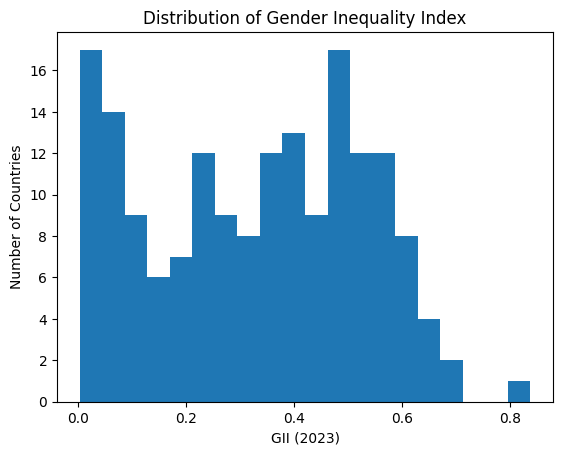

In [20]:
import matplotlib.pyplot as plt

plt.hist(df["gii_2023"], bins=20)
plt.xlabel("GII (2023)")
plt.ylabel("Number of Countries")
plt.title("Distribution of Gender Inequality Index")
plt.show()


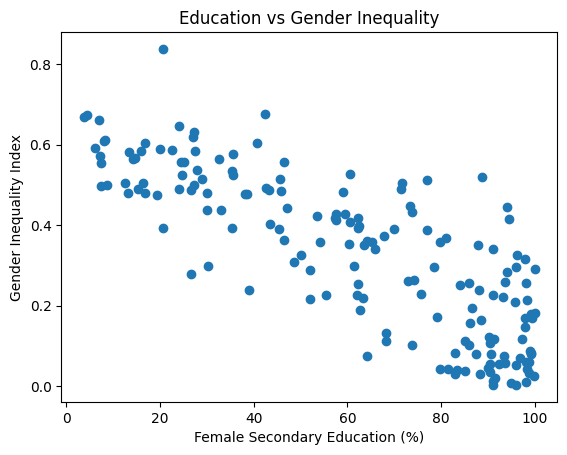

In [21]:
plt.scatter(df["secondary_education_female_pct_2023"], df["gii_2023"])
plt.xlabel("Female Secondary Education (%)")
plt.ylabel("Gender Inequality Index")
plt.title("Education vs Gender Inequality")
plt.show()


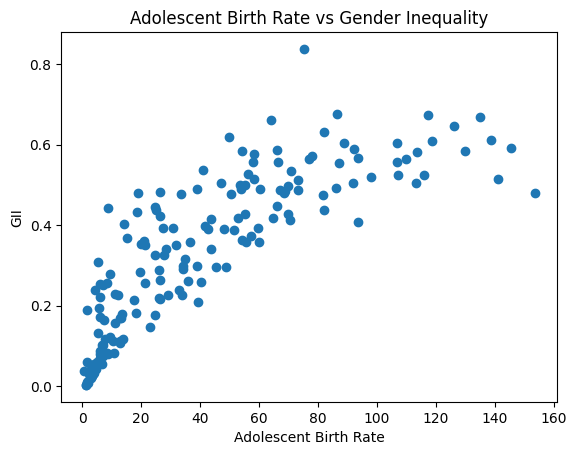

In [22]:
plt.scatter(df["adolescent_birth_rate_2023"], df["gii_2023"])
plt.xlabel("Adolescent Birth Rate")
plt.ylabel("GII")
plt.title("Adolescent Birth Rate vs Gender Inequality")
plt.show()


In [24]:
## Data Wrangling / Cleansing

df = df.drop(columns=["gii_rank_2023"])


In [25]:
df

,hdi_rank,country,gii_2023,mmr_2020,adolescent_birth_rate_2023,parliament_seats_female_pct_2023,secondary_education_female_pct_2023,secondary_education_male_pct_2023,labour_force_female_pct_2023,labour_force_male_pct_2023
0,1,Iceland,0.024,2.654418,3.369,47.619048,99.875916,99.582733,70.46,79.31
1,2,Norway,0.004,1.663741,1.405,46.153846,95.929504,98.505096,62.13,69.20
2,2,Switzerland,0.010,7.378755,1.483,37.804878,98.036560,98.324165,62.57,72.86
3,4,Denmark,0.003,4.657717,1.140,43.575419,90.998726,92.489220,59.70,67.70
4,5,Germany,0.057,4.428440,5.473,35.279503,93.591591,94.346039,56.41,66.72
...,...,...,...,...,...,...,...,...,...,...
188,188,Niger,0.591,441.072548,145.324,25.903614,6.100904,11.504092,73.37,87.32
189,190,Chad,0.670,1063.493291,134.738,25.888325,3.708090,15.069220,52.36,76.80
190,191,Central African Republic,NaN,835.266007,163.093,12.857143,14.580000,31.980000,NaN,NaN
191,192,Somalia,0.675,620.682321,117.100,20.731707,4.450000,17.780001,22.17,49.46


In [26]:
import numpy as np

df = df.replace("NaN", np.nan)
df = df.replace("", np.nan)


In [27]:
df = df.fillna(df.mean(numeric_only=True))


In [28]:
df.isna().sum()


,0
hdi_rank,0
country,0
gii_2023,0
mmr_2020,0
adolescent_birth_rate_2023,0
parliament_seats_female_pct_2023,0
secondary_education_female_pct_2023,0
secondary_education_male_pct_2023,0
labour_force_female_pct_2023,0
labour_force_male_pct_2023,0


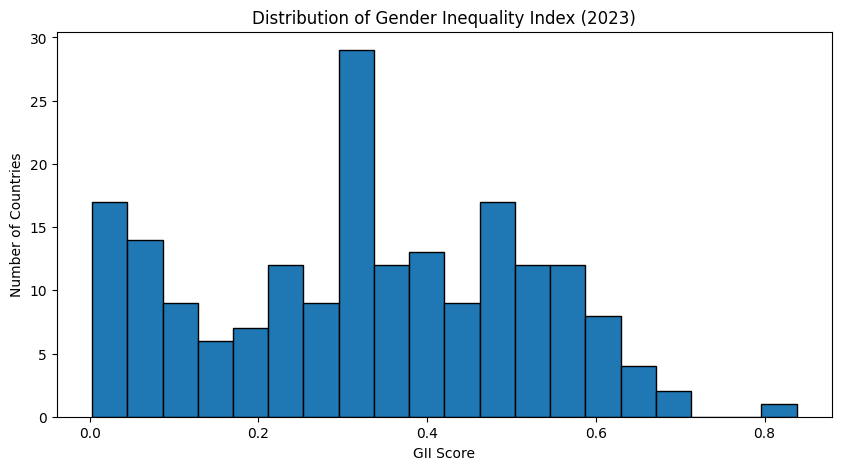

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df["gii_2023"], bins=20, edgecolor='black')
plt.title("Distribution of Gender Inequality Index (2023)")
plt.xlabel("GII Score")
plt.ylabel("Number of Countries")
plt.show()


In [30]:
df.nlargest(10, "gii_2023")[["country", "gii_2023"]]


,country,gii_2023
183,Yemen,0.838
163,Nigeria,0.677
191,Somalia,0.675
189,Chad,0.670
180,Afghanistan,0.661
176,Liberia,0.646
173,Guinea-Bissau,0.632
165,Haiti,0.618
187,Mali,0.612
178,Guinea,0.609


from matplotlib import pyplot as plt
_df_3['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['gii_2023'].plot(kind='hist', bins=20, title='gii_2023')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='gii_2023', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['gii_2023'].plot(kind='line', figsize=(8, 4), title='gii_2023')
plt.gca().spines[['top', 'right']].set_visible(False)

In [31]:
df.nsmallest(10, "gii_2023")[["country", "gii_2023"]]


,country,gii_2023
3,Denmark,0.003
1,Norway,0.004
5,Sweden,0.007
2,Switzerland,0.010
8,Netherlands,0.013
11,Finland,0.021
0,Iceland,0.024
9,Belgium,0.031
12,Singapore,0.031
21,Austria,0.033


from matplotlib import pyplot as plt
_df_0['gii_2023'].plot(kind='hist', bins=20, title='gii_2023')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['gii_2023']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'gii_2023'}, axis=1)
              .sort_values('gii_2023', ascending=True))
  xs = counted['gii_2023']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('gii_2023', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('gii_2023')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['gii_2023'].plot(kind='line', figsize=(8, 4), title='gii_2023')
plt.gca().spines[['top', 'right']].set_visible(False)

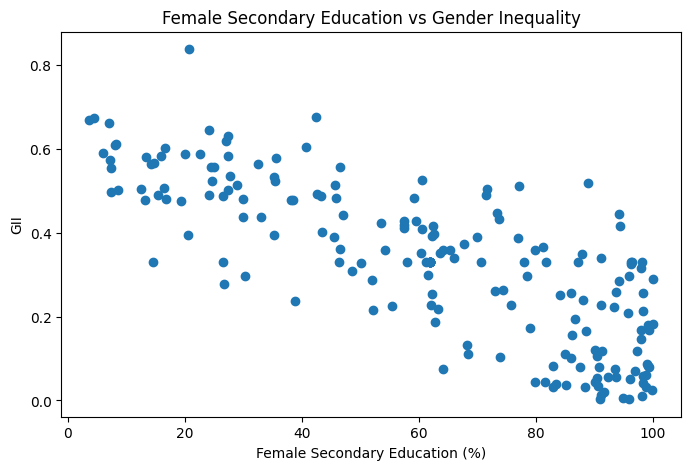

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(df["secondary_education_female_pct_2023"], df["gii_2023"])
plt.title("Female Secondary Education vs Gender Inequality")
plt.xlabel("Female Secondary Education (%)")
plt.ylabel("GII")
plt.show()


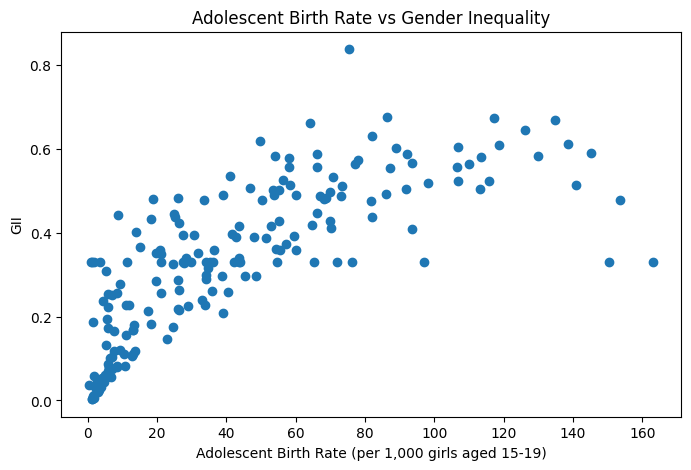

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(df["adolescent_birth_rate_2023"], df["gii_2023"])
plt.title("Adolescent Birth Rate vs Gender Inequality")
plt.xlabel("Adolescent Birth Rate (per 1,000 girls aged 15-19)")
plt.ylabel("GII")
plt.show()


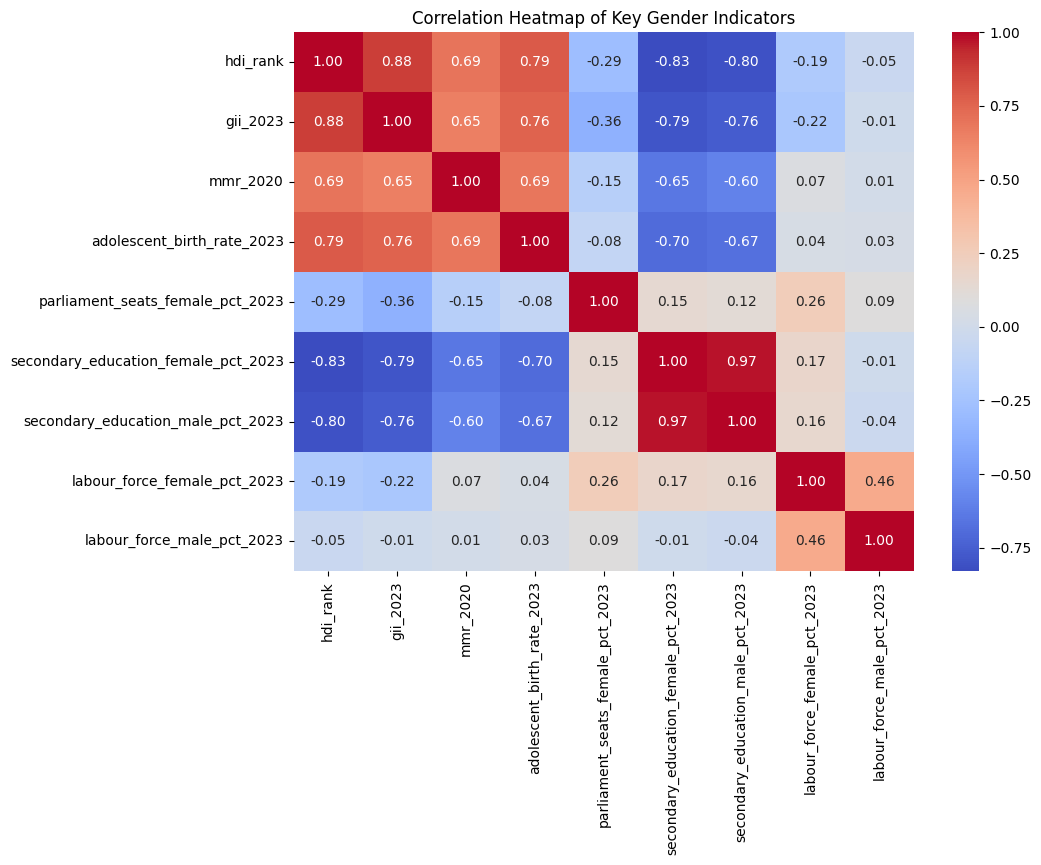

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Gender Indicators")
plt.show()


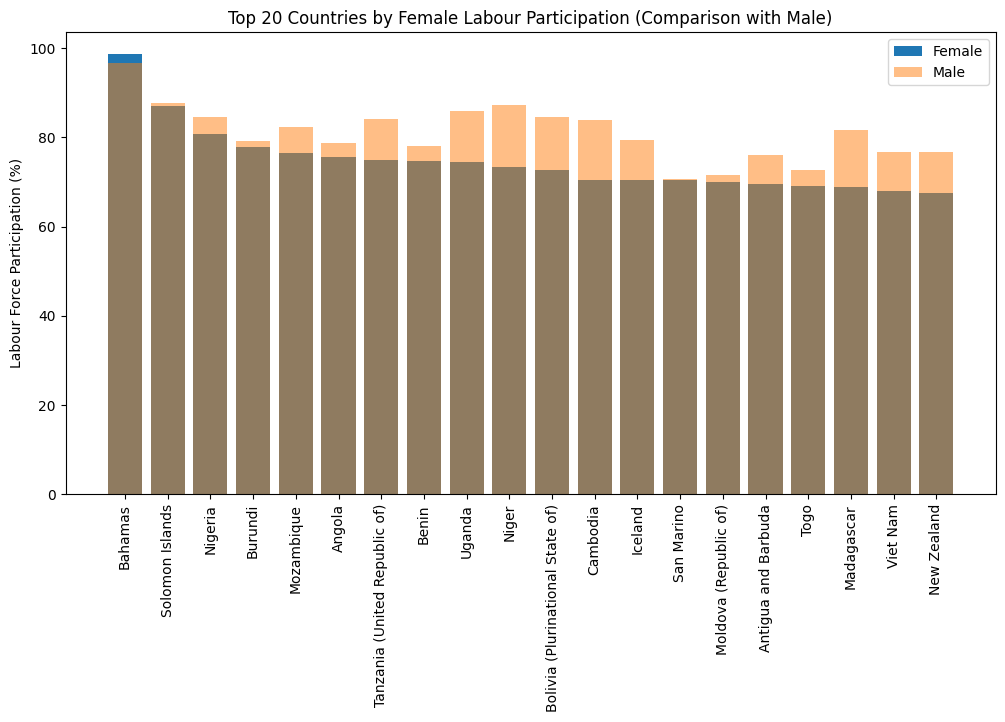

In [38]:
df_sorted = df.sort_values("labour_force_female_pct_2023", ascending=False).head(20)

plt.figure(figsize=(12,6))
plt.bar(df_sorted["country"], df_sorted["labour_force_female_pct_2023"], label="Female")
plt.bar(df_sorted["country"], df_sorted["labour_force_male_pct_2023"], alpha=0.5, label="Male")
plt.xticks(rotation=90)
plt.title("Top 20 Countries by Female Labour Participation (Comparison with Male)")
plt.ylabel("Labour Force Participation (%)")
plt.legend()
plt.show()


In [39]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x="secondary_education_female_pct_2023",
    y="labour_force_female_pct_2023",
    z="gii_2023",
    color="gii_2023",
    hover_name="country",
    title="3D Relationship Between Female Education, Labour Participation, and Gender Inequality",
    labels={
        "secondary_education_female_pct_2023": "Female Secondary Education (%)",
        "labour_force_female_pct_2023": "Female Labour Participation (%)",
        "gii_2023": "Gender Inequality Index"
    },
)

fig.show()


In [41]:
#Task F — Machine Learning Model 1: Multiple Linear Regression

# Target variable
y = df["gii_2023"]

# Feature variables
X = df.drop(columns=["gii_2023", "country"])


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

mse, r2


(0.006229422218627586, 0.7873346768923712)

In [45]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df


,Feature,Coefficient
0,hdi_rank,0.001410
7,labour_force_male_pct_2023,0.001287
2,adolescent_birth_rate_2023,0.001200
5,secondary_education_male_pct_2023,0.000245
1,mmr_2020,0.000018
4,secondary_education_female_pct_2023,-0.001527
6,labour_force_female_pct_2023,-0.001807
3,parliament_seats_female_pct_2023,-0.002460


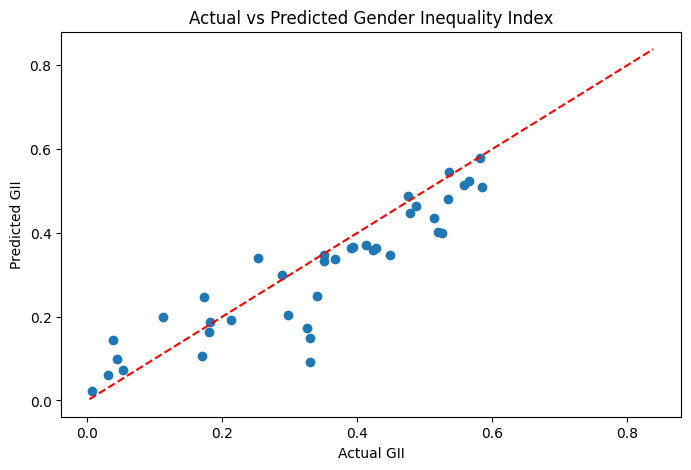

In [46]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual GII")
plt.ylabel("Predicted GII")
plt.title("Actual vs Predicted Gender Inequality Index")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


In [47]:
#Task F — Machine Learning Model 2: Classification

df["gii_category"] = pd.qcut(df["gii_2023"], q=3, labels=["Low", "Medium", "High"])
df["gii_category"].value_counts()


,count
gii_category,
Low,65
High,65
Medium,63


In [48]:
X = df.drop(columns=["gii_2023", "gii_category", "country"])
y = df["gii_category"]


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [50]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

acc, report, matrix


(0.8205128205128205,
 '              precision    recall  f1-score   support\n\n        High       0.77      0.77      0.77        13\n         Low       1.00      0.92      0.96        13\n      Medium       0.71      0.77      0.74        13\n\n    accuracy                           0.82        39\n   macro avg       0.83      0.82      0.82        39\nweighted avg       0.83      0.82      0.82        39\n',
 array([[10,  0,  3],
        [ 0, 12,  1],
        [ 3,  0, 10]]))

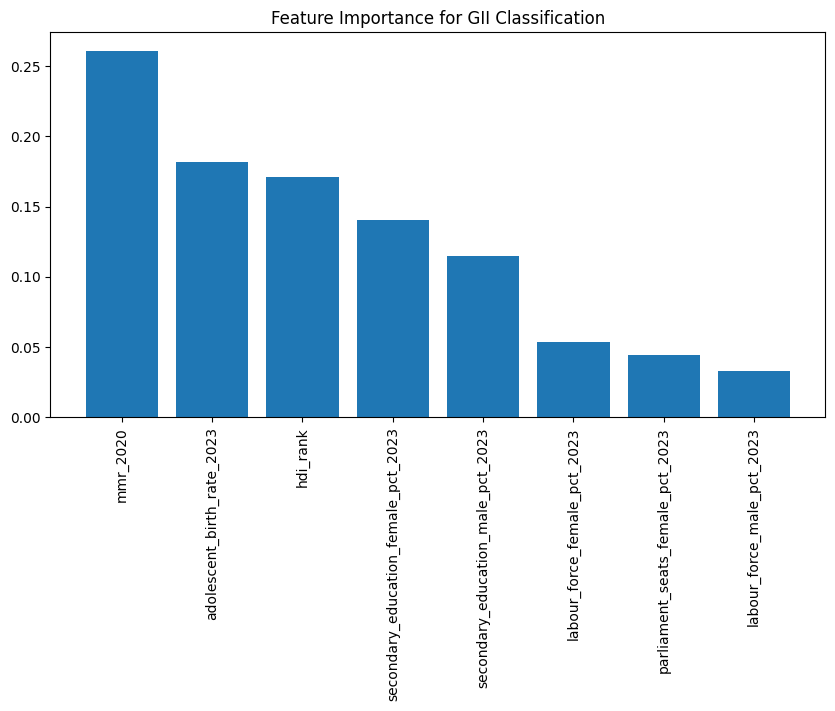

In [52]:
import matplotlib.pyplot as plt
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Feature Importance for GII Classification")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


In [54]:
#ADVANCE MODEL 1: Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [55]:
y_pred_gbc = gbc.predict(X_test)

acc_gbc = accuracy_score(y_test, y_pred_gbc)
report_gbc = classification_report(y_test, y_pred_gbc)
matrix_gbc = confusion_matrix(y_test, y_pred_gbc)

acc_gbc, report_gbc, matrix_gbc


(0.7435897435897436,
 '              precision    recall  f1-score   support\n\n        High       0.65      0.85      0.73        13\n         Low       0.92      0.92      0.92        13\n      Medium       0.67      0.46      0.55        13\n\n    accuracy                           0.74        39\n   macro avg       0.75      0.74      0.73        39\nweighted avg       0.75      0.74      0.73        39\n',
 array([[11,  0,  2],
        [ 0, 12,  1],
        [ 6,  1,  6]]))

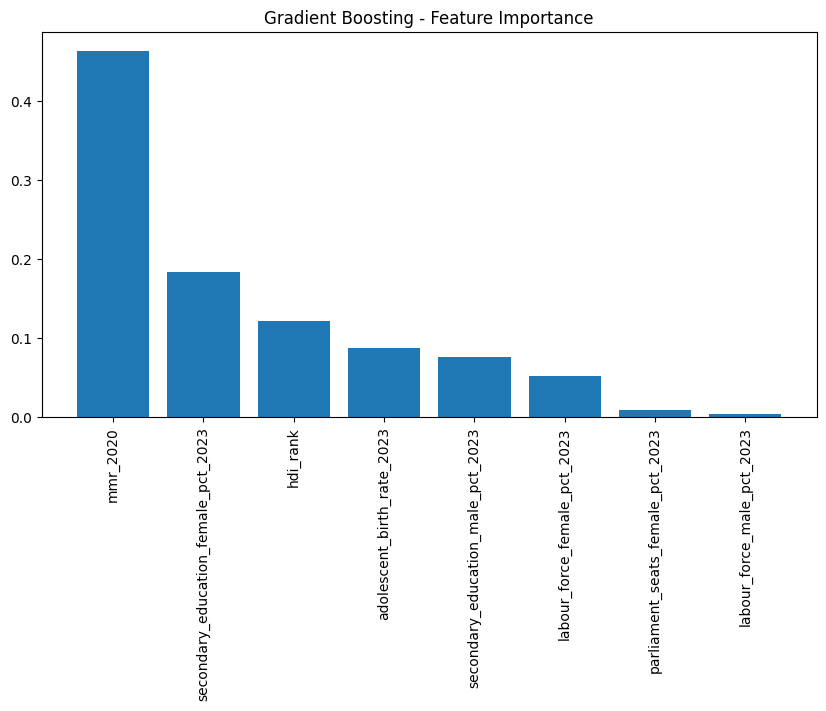

In [56]:
importances = gbc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Gradient Boosting - Feature Importance")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.show()


In [57]:
#ADVANCE MODEL 2: Support Vector Classifier (SVC)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [58]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)


SVC(probability=True, random_state=42)

In [59]:
y_pred_svc = svc.predict(X_test_scaled)

acc_svc = accuracy_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)
matrix_svc = confusion_matrix(y_test, y_pred_svc)

acc_svc, report_svc, matrix_svc


(0.7692307692307693,
 '              precision    recall  f1-score   support\n\n        High       0.75      0.69      0.72        13\n         Low       0.92      0.92      0.92        13\n      Medium       0.64      0.69      0.67        13\n\n    accuracy                           0.77        39\n   macro avg       0.77      0.77      0.77        39\nweighted avg       0.77      0.77      0.77        39\n',
 array([[ 9,  0,  4],
        [ 0, 12,  1],
        [ 3,  1,  9]]))